In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


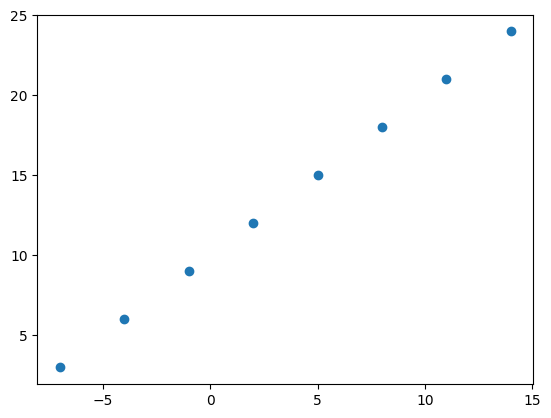

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(x,y)

In [4]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [5]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

2024-02-12 23:01:23.295102: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 23:01:23.370469: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 23:01:23.370509: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 23:01:23.373535: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-12 23:01:23.373645: I external/local_xla/xla/stream_executor

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [7]:
X = tf.constant(x)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

In [9]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=25)

Epoch 1/25
1/1 [==============================] - 1s 655ms/step - loss: 13.0577 - mae: 13.0577
Epoch 2/25
1/1 [==============================] - 0s 8ms/step - loss: 12.9252 - mae: 12.9252


2024-02-12 23:01:24.688701: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2024-02-12 23:01:24.688776: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2024-02-12 23:01:24.688860: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2024-02-12 23:01:24.774601: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f13513ca830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-12 23:01:24.774648: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4080 Laptop GPU, Compute Capability 8.9
2024-02-12 23:01:24.811306: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-02-12 23:01:24.830094: W externa

Epoch 3/25
1/1 [==============================] - 0s 10ms/step - loss: 12.7927 - mae: 12.7927
Epoch 4/25
1/1 [==============================] - 0s 9ms/step - loss: 12.6602 - mae: 12.6602
Epoch 5/25
1/1 [==============================] - 0s 8ms/step - loss: 12.5277 - mae: 12.5277
Epoch 6/25
1/1 [==============================] - 0s 8ms/step - loss: 12.3952 - mae: 12.3952
Epoch 7/25
1/1 [==============================] - 0s 8ms/step - loss: 12.2627 - mae: 12.2627
Epoch 8/25
1/1 [==============================] - 0s 8ms/step - loss: 12.1302 - mae: 12.1302
Epoch 9/25
1/1 [==============================] - 0s 9ms/step - loss: 11.9977 - mae: 11.9977
Epoch 10/25
1/1 [==============================] - 0s 8ms/step - loss: 11.8652 - mae: 11.8652
Epoch 11/25
1/1 [==============================] - 0s 9ms/step - loss: 11.7327 - mae: 11.7327
Epoch 12/25
1/1 [==============================] - 0s 9ms/step - loss: 11.6002 - mae: 11.6002
Epoch 13/25
1/1 [==============================] - 0s 9ms/step - l

In [10]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 80ms/step


array([[17.273455]], dtype=float32)

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 260ms/step - loss: 14.8573 - mae: 14.8573
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 14.7248 - mae: 14.7248
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 14.5923 - mae: 14.5923
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 14.4598 - mae: 14.4598
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 14.3273 - mae: 14.3273
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 14.1948 - mae: 14.1948
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 14.0623 - mae: 14.0623
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 13.9298 - mae: 13.9298
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7973 - mae: 13.7973
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6648 - mae: 13.6648
Epoch 11/100
1/1 [==============================] - 0s 

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 51ms/step


array([[29.409975]], dtype=float32)

In [34]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 555ms/step - loss: 12.9038 - mae: 12.9038
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8232 - mae: 12.8232
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 12.7425 - mae: 12.7425
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.6616 - mae: 12.6616
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 12.5815 - mae: 12.5815
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5015 - mae: 12.5015
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4214 - mae: 12.4214
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 12.3411 - mae: 12.3411
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.2606 - mae: 12.2606
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 12.1800 - mae: 12.1800
Epoch 11/100
1/1 [==============================] -

In [35]:
model.predict([17.0])

1/1 [==============================] - 0s 52ms/step


array([[26.342056]], dtype=float32)

In [36]:
X = tf.range(-100,100,4)
y = X + 10

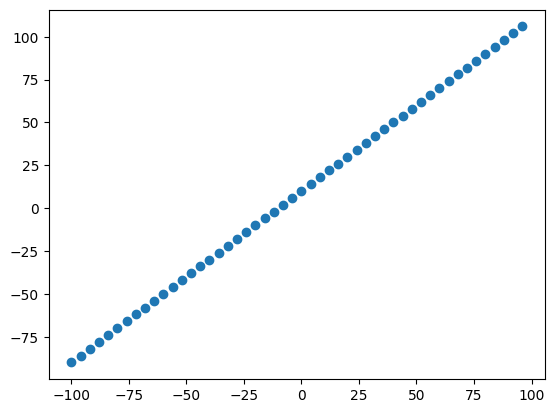

In [37]:
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [39]:
from sklearn.model_selection import train_test_split

X_numpy = X.numpy()
y_numpy = y.numpy()
X_train, X_test, y_train, y_test = train_test_split(X_numpy,y_numpy, test_size=0.2, random_state=42)

X_train = tf.constant(X_train)
X_test = tf.constant(X_test)
y_train = tf.constant(y_train)
y_test = tf.constant(y_test)

In [41]:
len(X_train), len(X_test)

(40, 10)

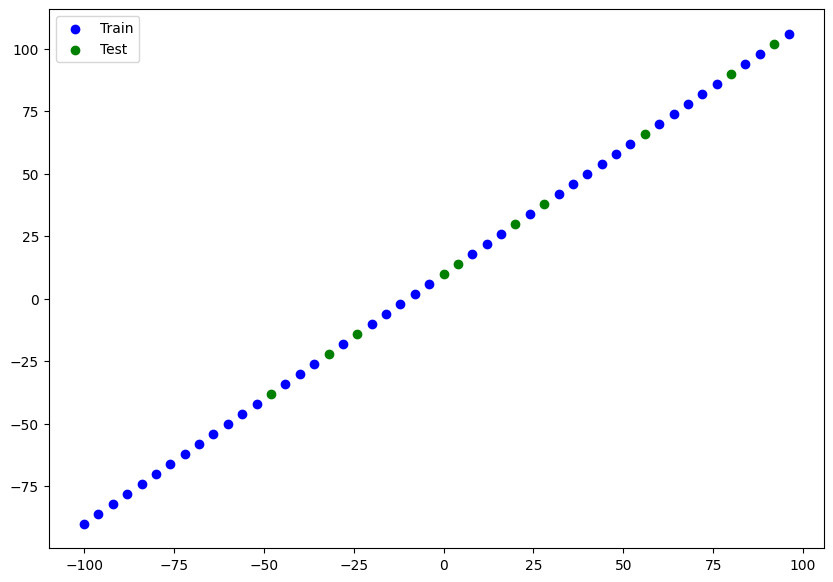

In [44]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b',label='Train')
plt.scatter(X_test, y_test, c='g',label='Test')
plt.legend();